## **2. 필요한 라이브러리 로드**

In [1]:
# 데이터 분석을 위한 pandas, 수치 계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## **3. 데이터셋 로드**

In [3]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **4. Feature Engineering**

### **4.1 수치형 변수를 범주형 변수로 만들기**

In [6]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [65]:
# One-Hot-Encoding
# 수치 → 범주 →  수치
df['Age_low'] = df['Age'] < 30
df['Age_middle'] = (df['Age'] >= 30) & (df['Age'] < 60)
df['Age_high'] = df['Age'] > 60
df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<AxesSubplot: xlabel='Age_high', ylabel='count'>

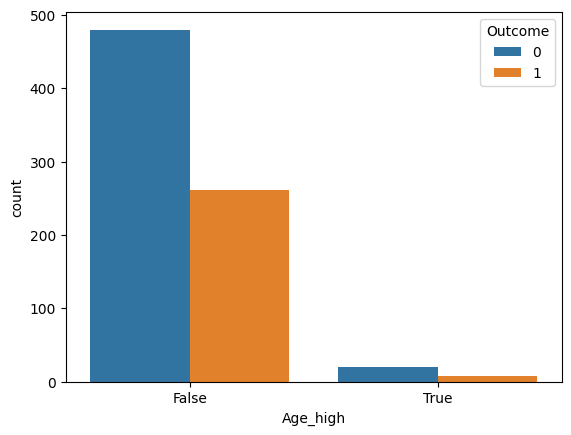

In [66]:
sns.countplot(data=df, x ='Age_high', hue='Outcome')

### **4.2. 결측치 다루기**

In [91]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [93]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [94]:
df['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [176]:
df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)
df[['Insulin', 'Insulin_nan']]

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0
...,...,...
763,180,180.0
764,0,NaN
765,112,112.0
766,0,NaN


In [177]:
df['Insulin_nan'].isnull().sum()

374

In [178]:
# 결측치 비율
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [179]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

C:\Users\Gong\AppData\Local\Temp\ipykernel_17020\368444390.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [180]:
# 결측치 채우기
df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), 'Insulin_nan' ] = 102.5
df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan' ] = 169.5

### **왜도, 첨도**
    - 왜도 : 한쪽으로 치우친 정도
    - 첨도 : 뾰족한 정도

C:\Users\Gong\AppData\Local\Temp\ipykernel_17020\2015453127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'] )


<AxesSubplot: xlabel='Insulin', ylabel='Density'>

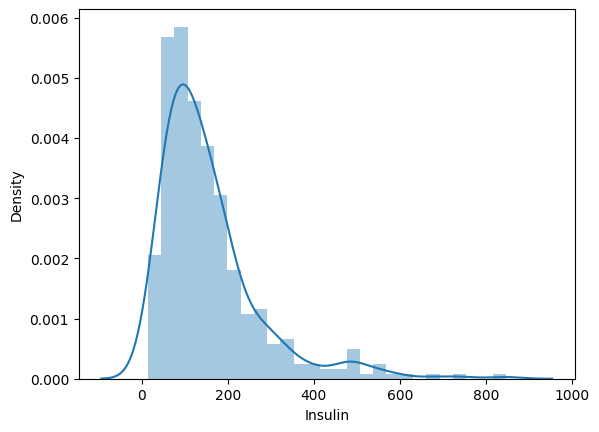

In [200]:
sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'] )

C:\Users\Gong\AppData\Local\Temp\ipykernel_17020\4007850383.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1))


<AxesSubplot: xlabel='Insulin', ylabel='Density'>

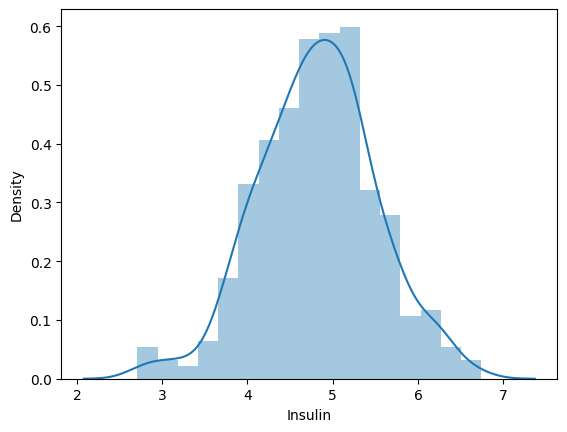

In [203]:
# log 값을 취할 때 보통 +1를 한다 : 0이하에는 마이너스 값으로 수렴하기 때문
sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1))

C:\Users\Gong\AppData\Local\Temp\ipykernel_17020\2248232018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_nan'])


<AxesSubplot: xlabel='Insulin_nan', ylabel='Density'>

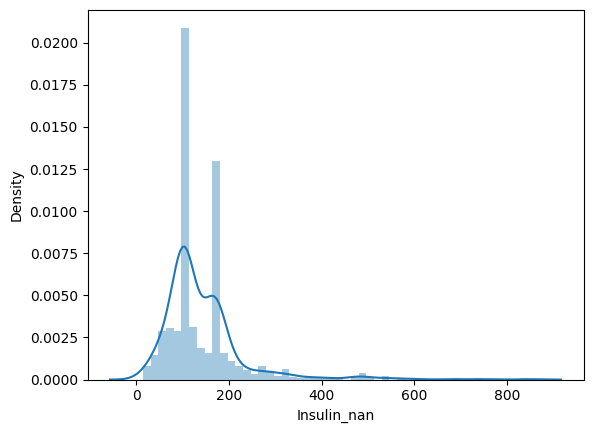

In [204]:
sns.distplot(df['Insulin_nan'])

C:\Users\Gong\AppData\Local\Temp\ipykernel_17020\1563339049.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_log'])


<AxesSubplot: xlabel='Insulin_log', ylabel='Density'>

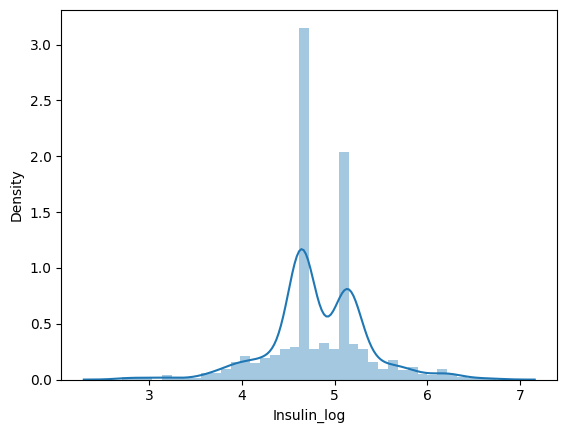

In [207]:
# 1 이하일 때는 마이너스 무한대로 수렴하는 것을 방지하기 위해서 +1을 해준다.
df['Insulin_log'] = np.log(df['Insulin_nan'] + 1)
sns.distplot(df['Insulin_log'])

### **4.4 파생변수 만들기**

    * EDA에서 해본 상관분석을 바탕으로 파생변수를 생성합니다.

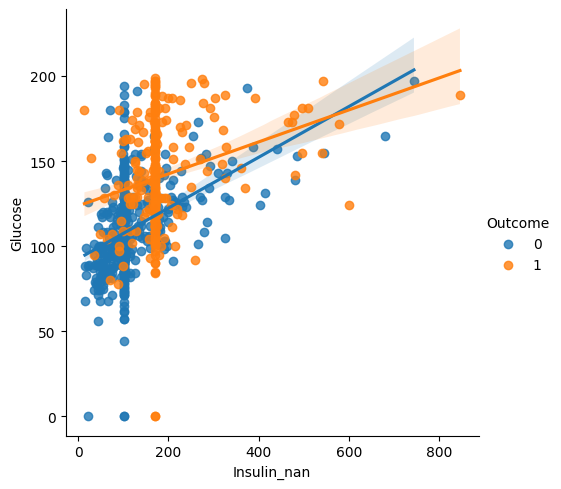

In [232]:
sns.lmplot(data = df, x ='Insulin_nan', y = 'Glucose', hue = 'Outcome')

In [238]:
df['low_glu_insulin'] = (df['Glucose'] < 100) & (df['Insulin_nan'] <= 102.5)
df['low_glu_insulin'] .head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [239]:
# 범주형 값에 대해서 크로스탭해준다.
pd.crosstab(df['Outcome'], df['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


### **4.5 이상치(outlier) 다루기**

<AxesSubplot: xlabel='Insulin_nan'>

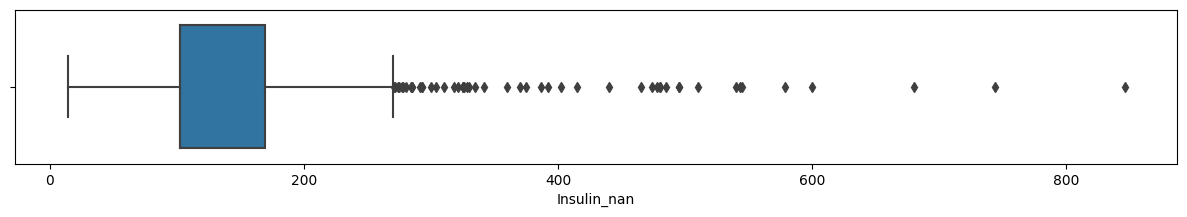

In [265]:
plt.figure(figsize=(15, 2))
sns.boxplot(x = df['Insulin_nan'])

In [266]:
df['Insulin_nan'].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [270]:
IQR3 = df['Insulin_nan'].quantile(0.75)
IQR1 = df['Insulin_nan'].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [272]:
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [278]:
df[df['Insulin_nan'] > OUT].shape

(51, 16)

In [308]:
df[df['Insulin_nan'] > 600].shape

(9, 16)

### **4.6 Scaling**

In [356]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Glucose', 'DiabetesPedigreeFunction']])
scale = scaler.transform(df[['Glucose', 'DiabetesPedigreeFunction']])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [357]:
df[['Glucose', 'DiabetesPedigreeFunction']] = scale
df[['Glucose', 'DiabetesPedigreeFunction']].head()

,Glucose,DiabetesPedigreeFunction
0,0.848324,0.468492
1,-1.123396,-0.365061
2,1.943724,0.604397
3,-0.998208,-0.920763
4,0.504055,5.484909


array([[<AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

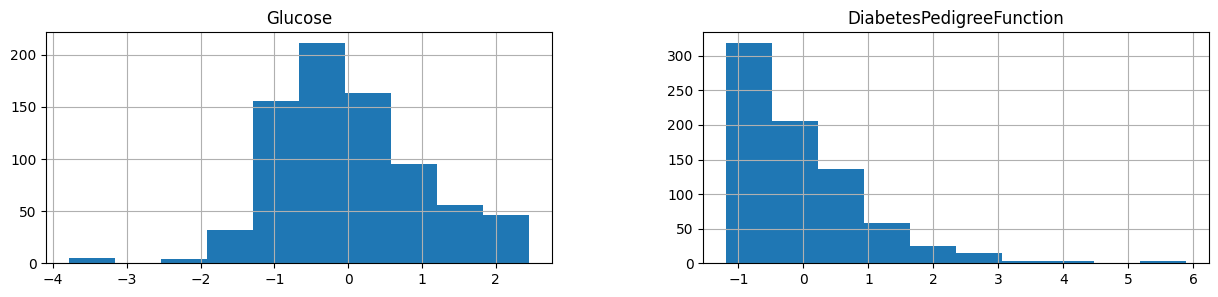

In [359]:
df[['Glucose', 'DiabetesPedigreeFunction']].hist(figsize = (15, 3))

## **5. CSV 파일로 저장하기**

In [384]:
df.to_csv('data/diabetes_feature.csv', index = False)

In [385]:
pd.read_csv('data/diabetes_feature.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,-0.622642,76,48,180,32.9,-0.908682,63,0,True,False,False,True,180.0,5.198497,False
764,2,0.034598,70,27,0,36.8,-0.398282,27,0,False,True,False,False,102.5,4.639572,False
765,5,0.003301,72,23,112,26.2,-0.685193,30,0,False,False,True,False,112.0,4.727388,False
766,1,0.159787,60,0,0,30.1,-0.371101,47,1,False,False,True,False,169.5,5.138735,False


## **5. 학습, 예측 데이터셋 나누기**

In [360]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담는다.
# split_count 

split_count = int(df.shape[0] * 0.8)
split_count


614

In [361]:
# train, test로 슬라이싱을 통해 데이터를 나눈다.
train = df[:split_count].copy()
train.shape

(614, 16)

In [362]:
train[train['Insulin_nan'] < 600].shape

(610, 16)

In [363]:
train = train[train['Insulin_nan'] < 600]
train.shape

(610, 16)

In [364]:
test = df[split_count:].copy()
test.shape

(154, 16)

## **6. 학습, 예측에 사용할 컬럼**

In [365]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

## **7. 정답값이자 예측해야 될 값**

In [366]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.

label_name = 'Outcome'
label_name

'Outcome'

## **8. 학습, 예측 데이터셋 만들기**

In [367]:
# 학습 세트 만들기 ex) 시험의 기출문제

X_train = train[feature_names]
X_train.shape
X_train.head()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,0.848324,72,35,33.6,0.468492,50,False,169.5,False
1,-1.123396,66,29,26.6,-0.365061,31,False,102.5,True
2,1.943724,64,0,23.3,0.604397,32,True,169.5,False
3,-0.998208,66,23,28.1,-0.920763,21,False,94.0,True
4,0.504055,40,35,43.1,5.484909,33,False,168.0,False


In [368]:
# 정답 값 만들기 ex) 기출문제의 정답

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [369]:
# 예측에 사용할 데이터셋 만들기 ex) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,0.535352,74,26,36.1,0.257084,50,True,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,False,102.5,False
616,-0.121888,96,0,28.7,-0.950964,30,False,102.5,False
617,-1.655448,62,13,20.1,-0.648952,23,False,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,True,169.5,False


In [370]:
# 예측의 정답값 ex) 실전 시험 문제의 정답

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## **9. 머신러닝 알고리즘 가져오기**

In [371]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

## **10. 학습(훈련)**

* 시험을 볼 때 기출문제(X_train)과 정답(y_train)을 보고 공부하는 과정과 유사

In [372]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **11. 예측**

* 실전 시험문제(X_test)라고 보면 된다. 정답을 직접 예측

In [373]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

## **12. 트리 알고리즘 분석**

* 의사결정나무 시각화

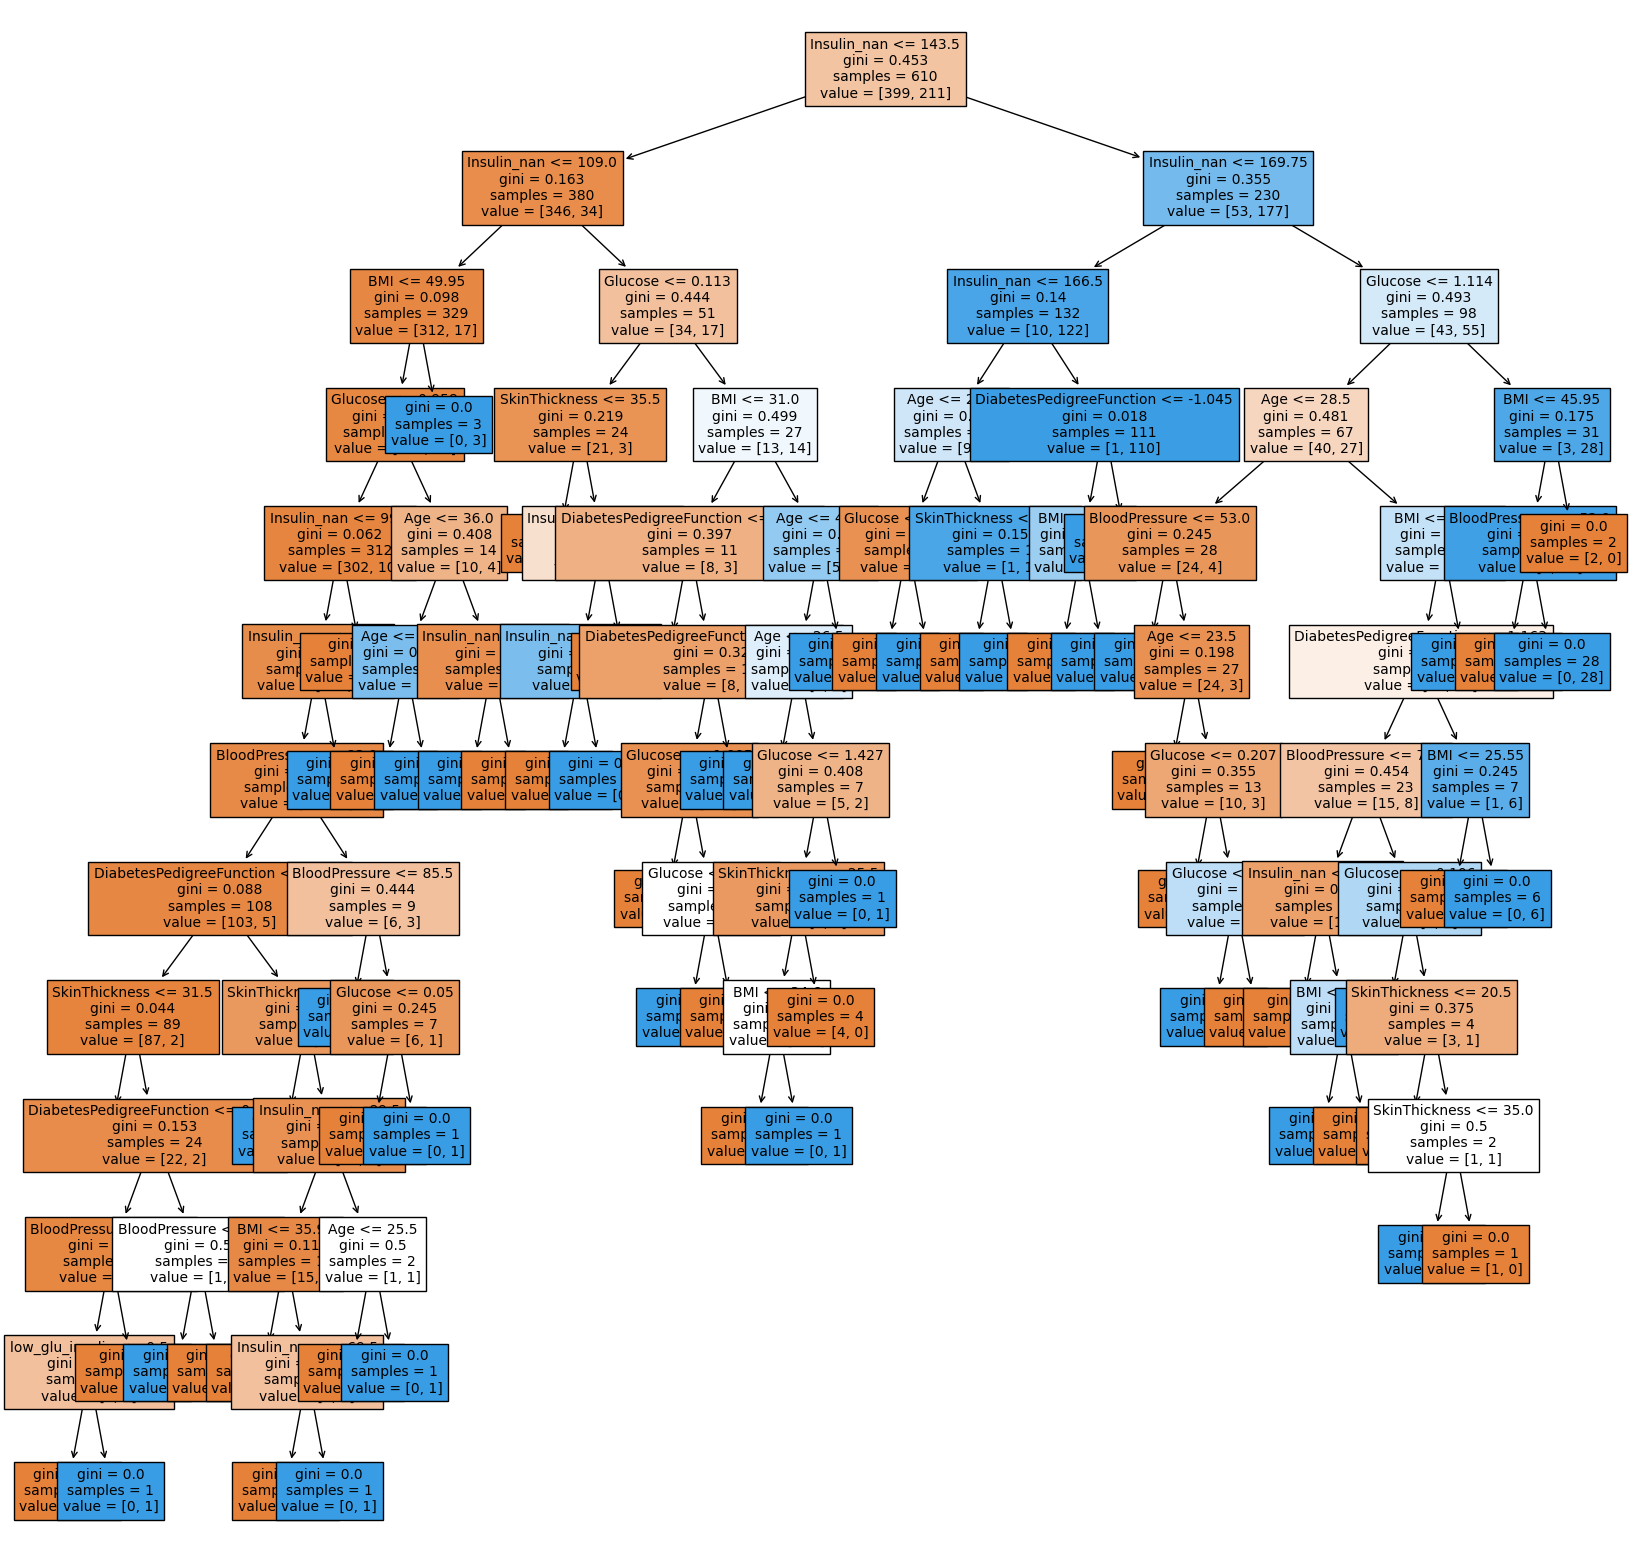

In [374]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 20))
tree = plot_tree(model,
                feature_names = feature_names,
                filled = True,
                fontsize = 10)

In [80]:
#!pip install graphviz

In [81]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                           feature_names = feature_names,
#                           filled = True)
# graphviz.Source(dot_tree)

In [375]:
# 피처의 중요도 추출 
model.feature_importances_

array([0.10720708, 0.03829317, 0.02739544, 0.08008031, 0.02662991,
       0.08272508, 0.        , 0.63283861, 0.0048304 ])

<AxesSubplot: >

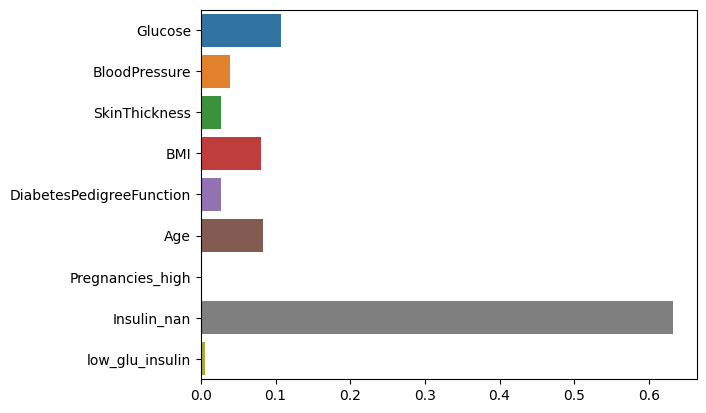

In [376]:
# 피처의 중요도 시각화 

sns.barplot(x =model.feature_importances_, y = feature_names )

## **13. 정확도(Accuracy) 측정하기**

In [377]:
# 실제값 - 예측값 빼주면 같은 값은 0으로 나오게 된다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.
# 44 → 39 → 49(나이 25세 기준) → 55(나이 30세 기준) 
# → 23(인슐린 결측치 평균으로 대체) → 16(인슐린 결측치 중앙값으로 대체) 
# → 15(인슐린&글루코스 상관계수로 파생변수 생성)
# → 15(인슐린 수치 600이상 이상치 제거)

diff_count = abs(y_test - y_predict ).sum() 
diff_count

15

In [378]:
# 예측의 정확도 , 100점 만점 중에 몇 점 맞았는지 구한다고 본다
# 71 → 85(인슐린 결측치 평균으로 대체) → 89(인슐린 결측치 중앙값으로 대체) 
# → 90(인슐린&글루코스 상관계수로 파생변수 생성)

(len(y_test) - diff_count) / len(y_test) * 100

90.25974025974025

In [379]:
# 위에서처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용한다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

90.25974025974025

In [380]:
# model의 score로 점수 계산

model.score(X_test, y_test) *100

90.25974025974025